# Convolutional Neural Network

### Importing the libraries

In [1]:
# !pip install --upgrade tensorflow keras Pillow

In [39]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [40]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [41]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [42]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [43]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [45]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a third convolutional layer

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [48]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.2))

### Step 4 - Full Connection

In [49]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

### Step 5 - Output Layer

In [50]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [51]:
cnn.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

### Training the CNN on the Training set and evaluating it on the Test set

In [53]:
cnn_fit = cnn.fit(x = training_set, validation_data = test_set, epochs = 40, callbacks = callback)

Epoch 1/40
250/250 [==============================] - 41s 160ms/step - loss: 0.6795 - accuracy: 0.5774 - val_loss: 0.6767 - val_accuracy: 0.5970
Epoch 2/40
250/250 [==============================] - 41s 163ms/step - loss: 0.5929 - accuracy: 0.6865 - val_loss: 0.5541 - val_accuracy: 0.7205
Epoch 3/40
250/250 [==============================] - 42s 168ms/step - loss: 0.5468 - accuracy: 0.7244 - val_loss: 0.4898 - val_accuracy: 0.7650
Epoch 4/40
250/250 [==============================] - 46s 182ms/step - loss: 0.5116 - accuracy: 0.7484 - val_loss: 0.4725 - val_accuracy: 0.7725
Epoch 5/40
250/250 [==============================] - 45s 180ms/step - loss: 0.4955 - accuracy: 0.7621 - val_loss: 0.4564 - val_accuracy: 0.7870
Epoch 6/40
250/250 [==============================] - 45s 178ms/step - loss: 0.4700 - accuracy: 0.7673 - val_loss: 0.4530 - val_accuracy: 0.7870
Epoch 7/40
250/250 [==============================] - 50s 200ms/step - loss: 0.4558 - accuracy: 0.7880 - val_loss: 0.4596 - val_ac

### Evaluating accuracy

In [54]:
import matplotlib.pyplot as plt

loss = cnn_fit.history['loss']
accuracy = cnn_fit.history['accuracy']
val_loss = cnn_fit.history['val_loss']
val_accuracy = cnn_fit.history['val_accuracy']

In [55]:
import statistics

print(f'''loss: {100 * statistics.mean(loss):.2f}%
Intervalo loss: {100 * min(loss):.2f} ~ {100 * max(loss):.2f}\n\n''')

print(f'''val_loss: {100 * statistics.mean(val_loss):.2f}%
Intervalo val_loss: {100 * min(val_loss):.2f} ~ {100 * max(val_loss):.2f}\n\n''')

print(f'''accuracy: {100 * statistics.mean(accuracy):.2f}%
Intervalo accuracy: {100 * min(accuracy):.2f} ~ {100 * max(accuracy):.2f}\n\n''')

print(f'''val_accuracy: {100 * statistics.mean(val_accuracy):.2f}%
Intervalo val_accuracy: {100 * min(val_accuracy):.2f} ~ {100 * max(val_accuracy):.2f}\n\n''')


loss: 39.68%
Intervalo loss: 29.78 ~ 67.95


val_loss: 43.29%
Intervalo val_loss: 32.89 ~ 67.67


accuracy: 81.57%
Intervalo accuracy: 57.74 ~ 87.50


val_accuracy: 80.50%
Intervalo val_accuracy: 59.70 ~ 85.70




## Part 4 - Making multiple predictions

In [56]:
import glob
images = glob.glob('dataset/single_prediction/*.jpg')

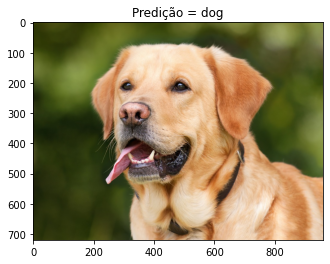

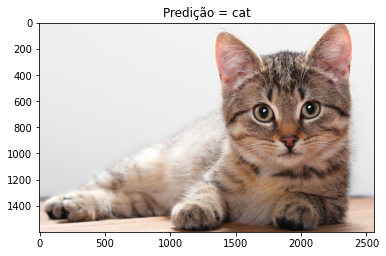

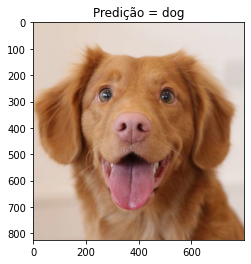

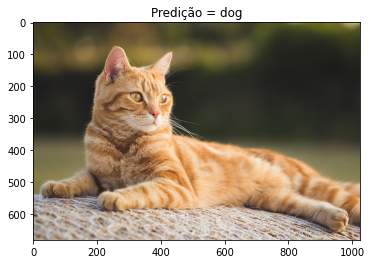

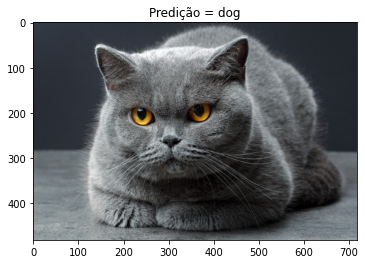

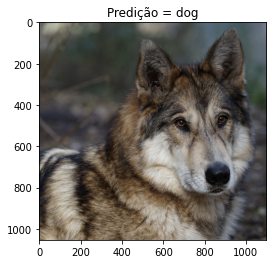

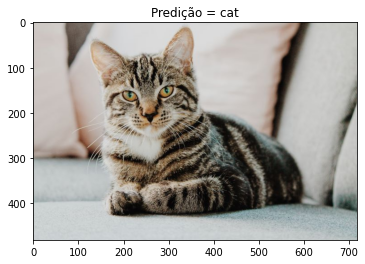

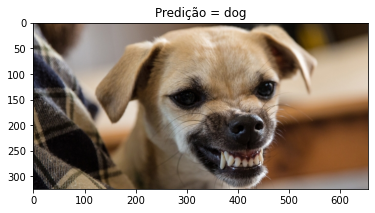

In [57]:
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg


for img in images:
  test_image = image.load_img(img, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  training_set.class_indices
  if result[0][0] == 1:
    prediction = 'dog'
  else:
    prediction = 'cat'

  plt.title('Predição = ' + prediction)
  pic = mpimg.imread(img)
  imgplot = plt.imshow(pic)
  plt.show()  

## Fim